<a href="https://colab.research.google.com/github/subrataBAEC/Deep-Learning-Basics/blob/main/telecom_customer_churn/telecom_customer_churn_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churin prediction using ANN
### 1. Data cleaning
### 2. Prediction using ANN
##### **Prepared By**: Subrata Saha
##### **Email**: subratabaec@gmail.com
##### **Time**: Feb, 2023

## Import libraries and dataset

In [ ]:
# !pip install tensorflow-gpu
# !pip install tensorflow 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scaling
from sklearn.preprocessing import MinMaxScaler

# split
from sklearn.model_selection import train_test_split

In [ ]:
# for google colab
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load data
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Deep_learning/practice/telco_customer_churn_cleaning_ANN/customer_churn.csv")
# initially taking 500 rows
#df=df[:10] 
display(df.head(5))
# df.head()
print("shape: ",df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


shape:  (7043, 21)


## Data Cleaning and Feature Engineering

**Note:**
Drop unnecessary columns. "customerID" and check for duplicate rows.

In [ ]:
# drop customer id
df.drop('customerID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# check duplicate records/rows
bool_series = df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)

Boolean series:
0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


***Note:***
It seems no NULL and duplicate values. find unique values of all column.

In [ ]:
# function to find unique
def find_unique(df):
  for col in df:
    print(f"{col}: {df[col].unique()}")
find_unique(df)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

**Note:**
It seems "TotalCharges" values are in string format shoud be in float or int. also may contain BLANK. need to convert in numeric.

In [ ]:
# convert to numeric
# pd.to_numeric(df.TotalCharges) # Gives error

**Note:**
It seems "TotalCharges" contains BLANK. need to deal with them first.

In [ ]:
# check blank value in "TotalCharges" column
# pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

# show blank value in "TotalCharges" column in the dataframe
display(df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()])

# count blank values
print("total rows contaning blank: ", df['TotalCharges'].value_counts()[" "])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


total rows contaning blank:  11


**Note:**
only 11 rows contain BLANK, so they will be removed.

In [ ]:
# remove rows with BLANK values and make a new dataframe df1
df1 = df[df.TotalCharges!=' ']
df1.shape

# print("total rows contaning blank: ", df1['TotalCharges'].value_counts()[" "])
# df1.info()
# df1['TotalCharges'].unique()
# df1.dtypes

(7032, 20)

**Note:**
Now convert "TotalCharges" column values to numeric.

In [ ]:
# convert to numeric
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

# check
print(df1.dtypes)

# print unique values
print("unique values", df1['TotalCharges'].unique())

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
unique values [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# find unique in all columns
find_unique(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

**Note:**
- some column contains "No internet service", "No phone service". replace them with "No". 
- Also "DSL" and "Fiber optic" of "InternetService" are replaced with "Yes"


In [ ]:
# replacing
df1.replace('No phone service','No',inplace=True) 
df1.replace('No internet service','No',inplace=True)

# for "InternetService" column
# df1.replace('DSL','Yes',inplace=True)
# df1.replace('Fiber optic','Yes',inplace=True)
df1['InternetService'].replace({'DSL':'Yes','Fiber optic':'Yes'},inplace=True)


# checking
print(find_unique(df1))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']
None


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


**Note:** 
- Convert "Yes" to 1 and "No" to 0
- Convert "Female" to 1 and "Male" to 0 in gender column.

In [ ]:
# for gender column
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
# for col in df1.columns:
#    df1[col] = df[col].replace('Yes', 1)
def replace_yes_no(df):
   for col in df:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
replace_yes_no(df1)

# checking
print(find_unique(df1))

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [1 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
None


**Note**: encode "Contract" and "PaymentMethod" column.

In [ ]:
# encoding
df2 = pd.get_dummies(data=df1, columns=['Contract','PaymentMethod']) #,drop_first=True
display(df2.head())
print(df1.shape)
print(df2.shape)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


(7032, 20)
(7032, 25)


**Note:**
- df1 has 20 columns. after one hot encoding "Contract"(split into 3 cols) and "PaymentMethod"(split into 4 cols) are converted to numeric data.
- total column numbers= 20-2+3+4=25

In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year              

Note:
- All columns are in numeric format.
- Check summary statistics

In [ ]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,0.286547,0.344852,...,64.798208,2283.300441,0.265785,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,0.452180,0.475354,...,30.085974,2266.771362,0.441782,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.862500,3794.737500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:** 
- There are some larges values. need scaling
- Applying Min-Max scaling

### Scaling

In [ ]:
# scaler = MinMaxScaler()
# df2=scaler.fit_transform(df2)
# df2.describe()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

# scaling 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

# scaling 2
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x=sc.fit_transform(x)

for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [1 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtectio

**Note:** Now df2 is ready for separating into dependent and independent variable.

## Train-Test Split

In [ ]:
# separating
X = df2.drop('Churn',axis=1)
y = df2['Churn']

# split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)

(5625, 24)
(1407, 24)


## ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU # activation function
from tensorflow.keras.layers import Dropout # to reduce overfitting

**Note:** ANN model building

### ANN method 1

In [ ]:
# way 1
# Initialising the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=24,activation='relu')) # input variable= 24

# Adding the first hidden layer
classifier.add(Dense(units=10,activation='relu')) # 6, or 7 not fixed

# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# # change learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) #The default learning rate is 0.001

In [ ]:
# early stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=20, epochs=50) # without early stopping
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size=10, epochs=30, callbacks=early_stopping)

Epoch 1/50
189/189 [==============================] - 5s 8ms/step - loss: 0.4616 - accuracy: 0.7749 - val_loss: 0.4169 - val_accuracy: 0.8029
Epoch 2/50
189/189 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.7956 - val_loss: 0.4184 - val_accuracy: 0.8061
Epoch 3/50
189/189 [==============================] - 1s 5ms/step - loss: 0.4300 - accuracy: 0.7970 - val_loss: 0.4260 - val_accuracy: 0.7851
Epoch 4/50
189/189 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.7964 - val_loss: 0.4134 - val_accuracy: 0.8024
Epoch 5/50
189/189 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.7964 - val_loss: 0.4145 - val_accuracy: 0.8040
Epoch 6/50
189/189 [==============================] - 1s 5ms/step - loss: 0.4182 - accuracy: 0.8015 - val_loss: 0.4411 - val_accuracy: 0.8024
Epoch 7/50
189/189 [==============================] - 1s 4ms/step - loss: 0.4177 - accuracy: 0.7996 - val_loss: 0.4125 - val_accuracy: 0.8045
Epoch 

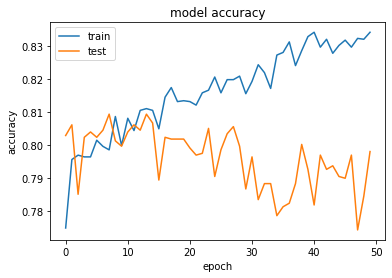

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

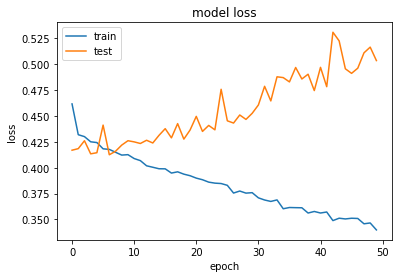

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[899, 134],
       [186, 188]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7725657427149965

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



### ANN method 2

In [ ]:
# way 2
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(24,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(X_train, y_train, validation_split=0.33, epochs=50)

Epoch 1/100
118/118 [==============================] - 2s 5ms/step - loss: 0.5163 - accuracy: 0.7521 - val_loss: 0.4491 - val_accuracy: 0.7733
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4466 - accuracy: 0.7837 - val_loss: 0.4240 - val_accuracy: 0.7916
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4311 - accuracy: 0.7919 - val_loss: 0.4173 - val_accuracy: 0.7938
Epoch 4/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.7978 - val_loss: 0.4157 - val_accuracy: 0.7964
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.8012 - val_loss: 0.4159 - val_accuracy: 0.7964
Epoch 6/100
118/118 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.8002 - val_loss: 0.4192 - val_accuracy: 0.7938
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4165 - accuracy: 0.7975 - val_loss: 0.4157 - val_accuracy: 0.7975

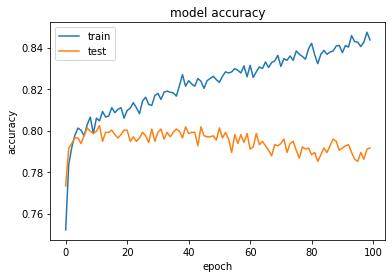

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

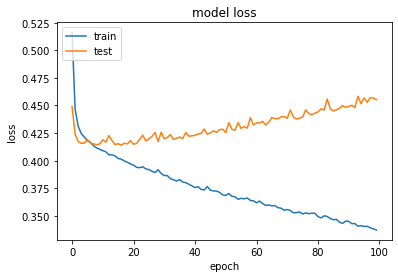

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[899, 134],
       [186, 188]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7725657427149965

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



**Acknowledgement:** 
- Motivated from codebasics. 
- https://www.youtube.com/watch?v=MSBY28IJ47U&list=LL&index=3&ab_channel=codebasics